# K-means

* Segmentação de mercados
* Encontrar grupos de clientes que irão comprar um produto (mala direta)
* Agrupamento de documentos
* Agrupamento de produtos similares
* Perfis de clientes (Netflix)
* Analise de redes sociais

* Centroides
* Calculo da distancia

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

## Credit Card Clients - 2 Atributos

In [2]:
df_credit = pd.read_csv('../data/credit_card_clients.csv', header= 1)
df_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
df_credit1 = df_credit.copy()

In [6]:
df_credit1['BILL TOTAL'] = df_credit['BILL_AMT1'] + df_credit['BILL_AMT2'] + df_credit['BILL_AMT3'] + df_credit['BILL_AMT4'] + df_credit1['BILL_AMT5'] + df_credit['BILL_AMT6']
df_credit1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [10]:
X_credit = df_credit1.iloc[:, [1, 25]].values
X_credit

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [11]:
scaler = StandardScaler()
X_credit_scaled = scaler.fit_transform(X_credit)
X_credit_scaled

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [12]:
wcss = []
for i in range(1, 11):
    kmeans_credit = KMeans(n_clusters=i, random_state=0)
    kmeans_credit.fit_transform(X_credit_scaled)
    wcss.append(kmeans_credit.inertia_)

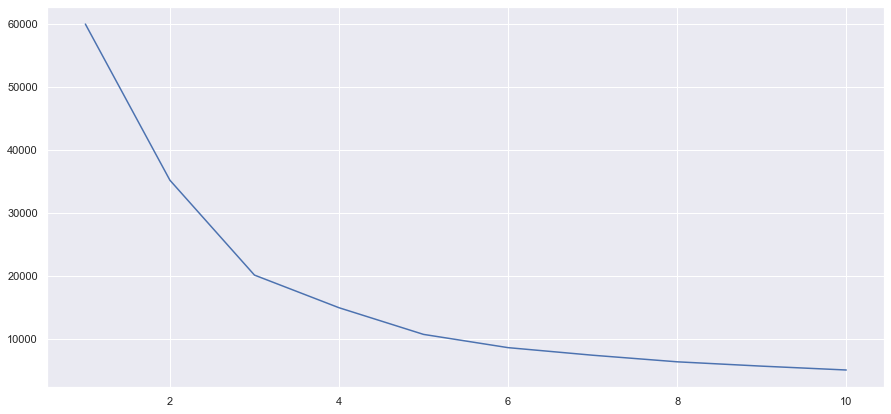

In [17]:
sns.set(rc = {'figure.figsize': (15,7)})
sns.lineplot(x= range(1,11), y= wcss);

In [19]:
kmeans_credit = KMeans(n_clusters= 4, random_state=0)

In [26]:
# Centroides
cent = kmeans_credit.cluster_centers_
cent

array([[-0.70300068, -0.34913734],
       [ 1.1000398 , -0.45367287],
       [ 1.61393477,  3.38061824],
       [ 0.16679768,  1.16289356]])

In [21]:
# Rotulos
rot = kmeans_credit.fit_predict(X_credit_scaled)

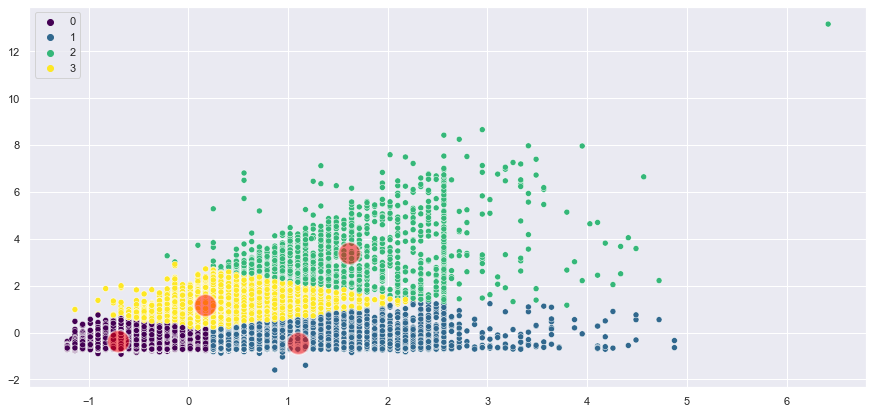

In [29]:
sns.scatterplot(x= X_credit_scaled[:,0],y= X_credit_scaled[:,1], hue=rot, palette='viridis')
sns.scatterplot(x= cent[:,0], y= cent[:,1], s=(500), alpha=.5, color='red');

In [30]:
client_list = np.column_stack((df_credit1, rot))
client_list = client_list[client_list[:, 26].argsort()]
client_list

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16789,  30000,      1, ...,      1,  14274,      0],
       [ 16788,  30000,      1, ...,      1,  90453,      0],
       ...,
       [ 20882, 110000,      1, ...,      0, 554308,      3],
       [ 20744, 220000,      1, ...,      0, 452961,      3],
       [ 20270, 150000,      2, ...,      0, 546939,      3]], dtype=int64)

## Credit Card Clients - 6 Atributos

In [32]:
X_clients = df_credit1.iloc[:, [1,2,3,4,5,25]].values
X_clients

array([[ 20000,      2,      2,      1,     24,   7704],
       [120000,      2,      2,      2,     26,  17077],
       [ 90000,      2,      2,      2,     34, 101653],
       ...,
       [ 30000,      1,      2,      2,     37,  70496],
       [ 80000,      1,      3,      1,     41, 266611],
       [ 50000,      1,      2,      1,     46, 230874]], dtype=int64)

In [34]:
scaler_clients = StandardScaler()
X_clients_scaled = scaler_clients.fit_transform(X_clients)
X_clients_scaled

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

Definir um número de clusters

In [35]:
wcss = []
for i in range(1, 11):
    kmeans_clients = KMeans(n_clusters=i, random_state=0)
    kmeans_clients.fit_transform(X_clients_scaled)
    wcss.append(kmeans_clients.inertia_)

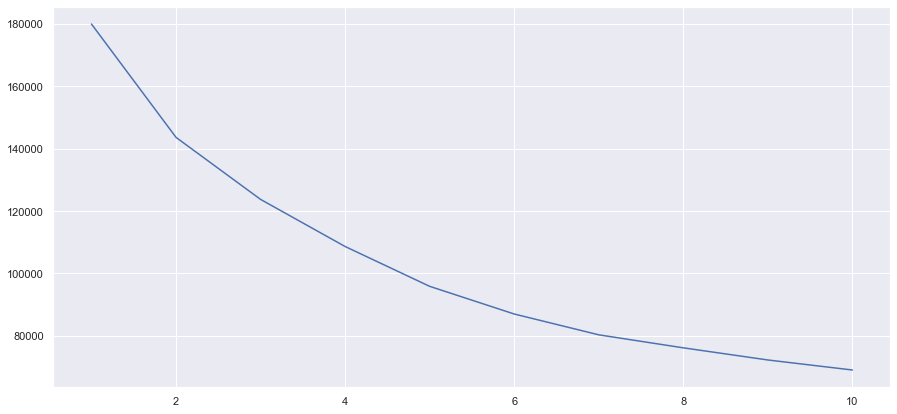

In [36]:
sns.lineplot(x= range(1,11), y= wcss);

In [49]:
kmeans_clients = KMeans(n_clusters=2, random_state=0)
rot = kmeans_clients.fit_predict(X_clients_scaled)

## PCA - Redução de Dimensionalidade

para a visualização do gráfico

In [50]:
pca = PCA(n_components= 2)
X_clients_pca = pca.fit_transform(X_clients_scaled)
X_clients_pca

array([[-0.74082054, -1.13671858],
       [-1.48027121, -0.30100547],
       [-0.94737386, -0.48666789],
       ...,
       [-0.79468657, -0.90012663],
       [ 1.17562376, -1.54746987],
       [ 1.13614987, -1.14039836]])

In [51]:
cent = kmeans_clients.cluster_centers_
cent

array([[ 0.10607733,  0.03487212,  0.22177885, -0.96648124,  0.55720655,
         0.03468322],
       [-0.09831059, -0.03231886, -0.20554071,  0.89571768, -0.51640915,
        -0.03214379]])

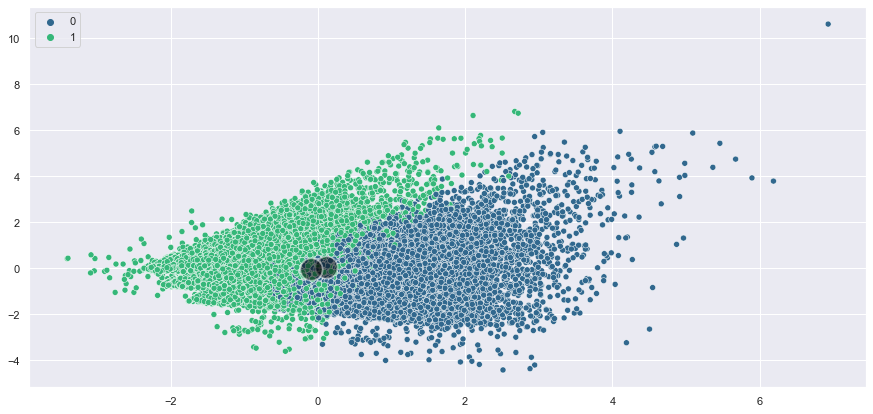

In [52]:
sns.scatterplot(x= X_clients_pca[:,0], y= X_clients_pca[:,1], hue=rot, palette='viridis')
sns.scatterplot(x= cent[:,0], y= cent[:,1], alpha=.5, s=(500), color='black');

In [54]:
client_list = np.column_stack((df_credit1, rot))
client_list = client_list[client_list[:, 26].argsort()]
client_list

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16671,  20000,      1, ...,      0,  20753,      0],
       [ 16669,  60000,      1, ...,      0, 334495,      0],
       ...,
       [  6249, 390000,      1, ...,      0, 393330,      1],
       [ 17363,  50000,      2, ...,      0,  53295,      1],
       [ 15000,  50000,      1, ...,      0, 249711,      1]], dtype=int64)

## Salario e Idade

In [55]:
x = [20, 27, 21, 37, 46, 53, 55, 47, 52, 32, 39, 41, 39, 48, 48]
y = [1000, 1200, 2900, 1850, 900, 950, 2000, 2100, 3000, 5900, 4100, 5100, 7000, 5000, 6500]

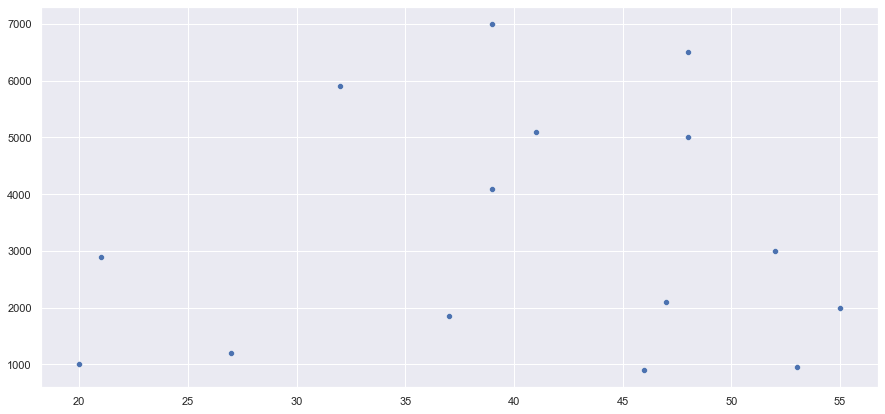

In [57]:
sns.scatterplot(x= x, y= y);

In [62]:
df_salario = np.array([[20, 1000],[27,1200],[21,2900],[37,1850],[46,900],[53,950],
                       [55,2000],[47,2100],[52,3000],[32,5900],[39,4100],[41,5100],
                       [39,7000],[48,5000],[48,6500]])
df_salario

array([[  20, 1000],
       [  27, 1200],
       [  21, 2900],
       [  37, 1850],
       [  46,  900],
       [  53,  950],
       [  55, 2000],
       [  47, 2100],
       [  52, 3000],
       [  32, 5900],
       [  39, 4100],
       [  41, 5100],
       [  39, 7000],
       [  48, 5000],
       [  48, 6500]])

In [61]:
scaler_salario = StandardScaler()
df_salario_s = scaler_salario.fit_transform(df_salario)
df_salario_s

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [63]:
kmeans_salario = KMeans(n_clusters= 3)
kmeans_salario.fit(df_salario_s)

KMeans(n_clusters=3)

In [64]:
# Centroides
cent = kmeans_salario.cluster_centers_
cent

array([[ 0.07703438,  1.11413572],
       [ 0.73953003, -0.72661025],
       [-1.63312883, -0.77505093]])

In [65]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[  41.16666667, 5600.        ],
       [  48.33333333, 1800.        ],
       [  22.66666667, 1700.        ]])

In [66]:
rot = kmeans_salario.labels_
rot

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

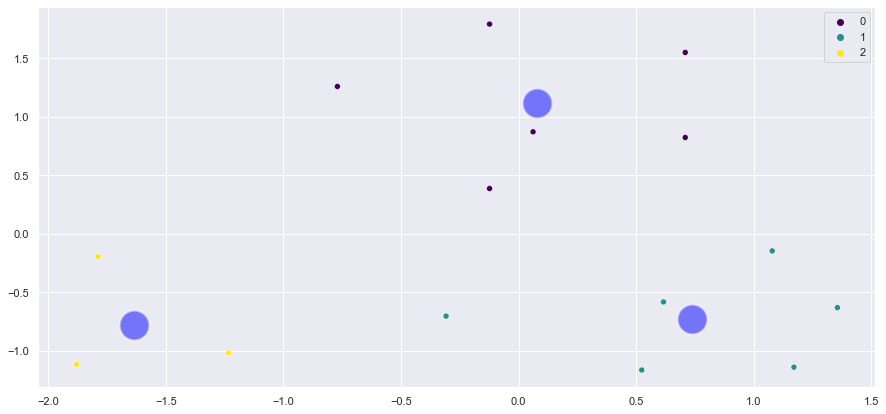

In [68]:
sns.scatterplot(x= df_salario_s[:,0], y= df_salario_s[:,1], hue=rot, palette='viridis')
sns.scatterplot(x= cent[:,0], y= cent[:,1], alpha=.5, s=[900], color='blue');

## Dados Randomicos

In [70]:
X_random , y_random = make_blobs(n_samples= 200, centers= 5, random_state=1)

In [71]:
y_random

array([0, 2, 3, 2, 2, 3, 4, 3, 2, 0, 3, 3, 4, 1, 3, 0, 0, 1, 2, 2, 0, 3,
       4, 3, 4, 1, 2, 4, 4, 1, 2, 4, 0, 3, 2, 0, 1, 2, 1, 4, 2, 1, 4, 4,
       2, 4, 1, 3, 2, 0, 0, 3, 3, 0, 3, 1, 0, 4, 2, 2, 1, 3, 3, 3, 2, 0,
       0, 1, 4, 2, 1, 4, 2, 4, 4, 1, 2, 3, 0, 4, 1, 1, 3, 2, 3, 0, 2, 2,
       2, 1, 4, 3, 0, 4, 3, 1, 4, 0, 2, 1, 0, 2, 4, 1, 4, 2, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 0, 1, 4, 0, 0, 2, 1, 1, 3, 0, 1, 2, 4, 2, 4, 0, 4,
       3, 3, 1, 1, 3, 0, 0, 3, 3, 3, 0, 0, 4, 2, 4, 0, 2, 3, 4, 3, 0, 4,
       3, 1, 1, 1, 0, 2, 4, 0, 1, 0, 4, 1, 1, 1, 3, 4, 1, 4, 4, 3, 0, 2,
       4, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 0, 3, 2, 4, 0, 1, 1, 4, 3, 4,
       2, 1])

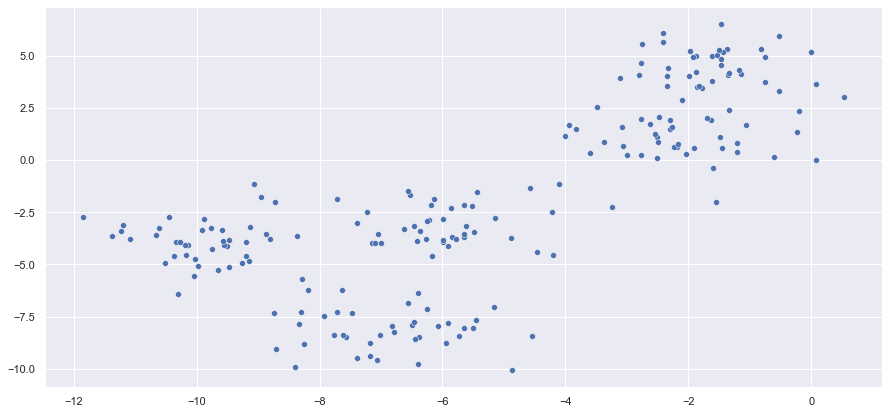

In [73]:
sns.scatterplot(x= X_random[:,0], y= X_random[:,1]);

In [74]:
kmeans_random = KMeans(n_clusters= 5)
kmeans_random.fit(X_random)

KMeans(n_clusters=5)

In [75]:
rot = kmeans_random.predict(X_random)
rot

array([2, 3, 4, 3, 3, 4, 0, 4, 3, 2, 4, 4, 4, 1, 4, 2, 2, 1, 3, 3, 2, 4,
       0, 4, 0, 1, 3, 0, 0, 1, 3, 0, 2, 4, 3, 2, 1, 3, 1, 2, 1, 1, 0, 0,
       3, 0, 1, 4, 3, 0, 2, 4, 4, 2, 4, 1, 2, 4, 3, 3, 1, 4, 4, 4, 3, 0,
       2, 1, 0, 3, 1, 0, 3, 0, 0, 1, 3, 1, 2, 0, 1, 1, 4, 3, 4, 2, 3, 3,
       3, 1, 0, 4, 2, 0, 4, 1, 0, 2, 3, 1, 2, 3, 0, 1, 0, 3, 1, 3, 4, 2,
       4, 4, 3, 1, 4, 2, 1, 0, 2, 2, 3, 1, 1, 4, 2, 1, 3, 0, 3, 0, 2, 0,
       4, 4, 1, 1, 4, 2, 2, 4, 4, 4, 2, 2, 0, 3, 0, 2, 3, 4, 0, 4, 2, 0,
       4, 1, 1, 1, 2, 3, 0, 2, 1, 2, 0, 1, 1, 1, 4, 0, 1, 0, 0, 4, 2, 3,
       0, 4, 3, 2, 3, 2, 2, 3, 1, 0, 1, 2, 2, 4, 3, 0, 2, 1, 1, 0, 4, 0,
       3, 1])

In [76]:
cent = kmeans_random.cluster_centers_
cent

array([[-2.17069756,  1.02591979],
       [-9.85620522, -3.91021738],
       [-1.58338528,  4.50520457],
       [-6.87958999, -8.11648104],
       [-5.90368078, -3.04489641]])

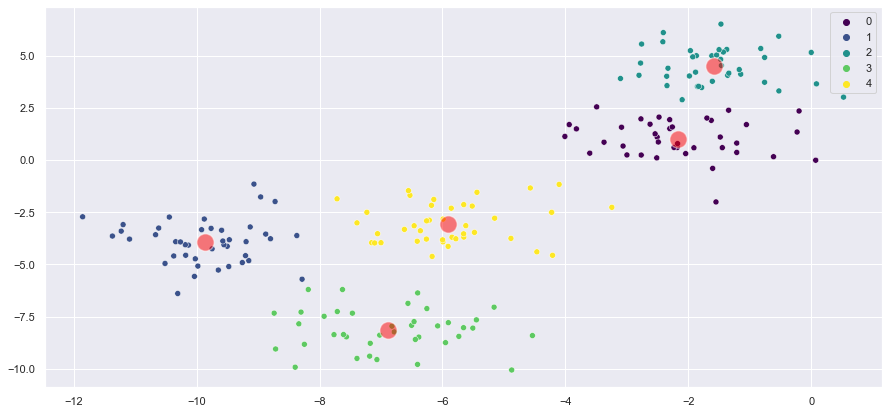

In [80]:
sns.scatterplot(x= X_random[:,0], y= X_random[:,1], hue=rot, palette='viridis')
sns.scatterplot(x = cent[:,0], y= cent[:,1], s=[300], color='red', alpha=.5);